In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
from elasticsearch import Elasticsearch
from elasticsearch import helpers
from ipywidgets import interact
import ipywidgets as widgets
from IPython.display import display
%matplotlib inline

In [2]:
movies = pd.read_csv('IMDB/IMDb movies.csv', low_memory=False)

movies.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


In [3]:
genre = []
for genr in movies['genre'].value_counts().index:
    if len(genr.split()) == 1:
        genre.append(genr)
genre.sort()
genre.insert(0,'Any')
print(genre)

['Any', 'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']


In [4]:
movies['language'].value_counts()

English                                         35939
French                                           3903
Spanish                                          2831
Japanese                                         2826
Italian                                          2731
                                                ...  
English, German, Portuguese, Turkish, French        1
English, French, Italian, Arabic                    1
English, Japanese, Icelandic                        1
English, French, Greek, Italian                     1
English, Polish, Russian, German                    1
Name: language, Length: 4377, dtype: int64

In [5]:
movies.isna().sum()

imdb_title_id                0
title                        0
original_title               0
year                         0
date_published               0
genre                        0
duration                     0
country                     64
language                   833
director                    87
writer                    1572
production_company        4455
actors                      69
description               2115
avg_vote                     0
votes                        0
budget                   62145
usa_gross_income         70529
worlwide_gross_income    54839
metascore                72550
reviews_from_users        7597
reviews_from_critics     11797
dtype: int64

<AxesSubplot:>

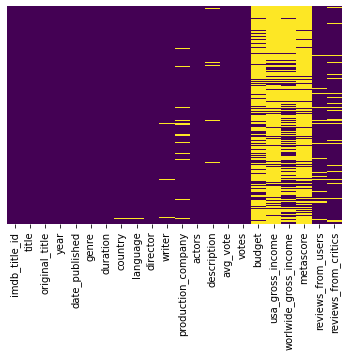

In [6]:
sns.heatmap(movies.isna(), yticklabels=False, cbar=False, cmap='viridis')

In [7]:
movies['language'].replace(np.nan, 'Missing', inplace=True)
movies['country'].replace(np.nan, 'Missing', inplace=True)

<AxesSubplot:>

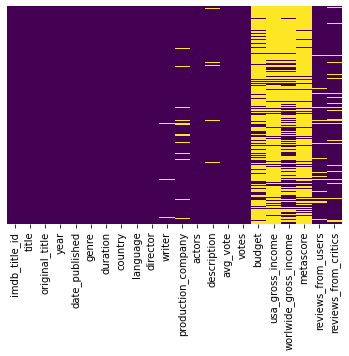

In [8]:
sns.heatmap(movies.isna(), yticklabels=False, cbar=False, cmap='viridis')

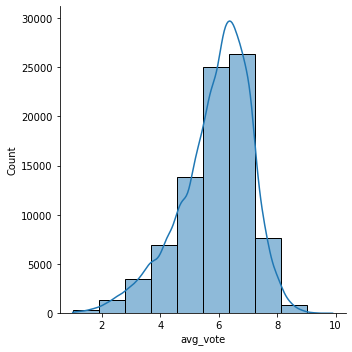

In [9]:
sns.displot(movies['avg_vote'], bins=10, kde=True)

In [10]:
filt = movies['imdb_title_id'] == 'tt8206668'
movies.loc[filt, 'year'] = 2019

movies.loc[filt]

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
83917,tt8206668,Bad Education,Bad Education,2019,TV Movie 2019,"Biography, Comedy, Crime",108,USA,English,Cory Finley,...,"Hugh Jackman, Ray Romano, Welker White, Alliso...",The beloved superintendent of New York's Rosly...,7.1,23973,NaN,NaN,NaN,79.0,135.0,98.0


In [11]:
movies['year'] = movies['year'].astype(int)

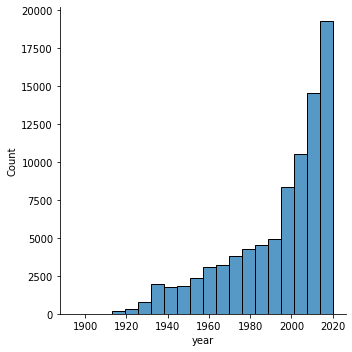

In [12]:
sns.displot(movies['year'], bins=20)

In [13]:
json_df = movies.to_dict('records')

In [14]:
json_df[0]

{'imdb_title_id': 'tt0000009',
 'title': 'Miss Jerry',
 'original_title': 'Miss Jerry',
 'year': 1894,
 'date_published': '1894-10-09',
 'genre': 'Romance',
 'duration': 45,
 'country': 'USA',
 'language': 'None',
 'director': 'Alexander Black',
 'writer': 'Alexander Black',
 'production_company': 'Alexander Black Photoplays',
 'actors': 'Blanche Bayliss, William Courtenay, Chauncey Depew',
 'description': 'The adventures of a female reporter in the 1890s.',
 'avg_vote': 5.9,
 'votes': 154,
 'budget': nan,
 'usa_gross_income': nan,
 'worlwide_gross_income': nan,
 'metascore': nan,
 'reviews_from_users': 1.0,
 'reviews_from_critics': 2.0}

In [15]:
filt = movies['imdb_title_id'] == 'tt8206668'
movies.loc[filt, 'year'] = 2019
movies.loc[filt]

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
83917,tt8206668,Bad Education,Bad Education,2019,TV Movie 2019,"Biography, Comedy, Crime",108,USA,English,Cory Finley,...,"Hugh Jackman, Ray Romano, Welker White, Alliso...",The beloved superintendent of New York's Rosly...,7.1,23973,NaN,NaN,NaN,79.0,135.0,98.0


In [16]:
es = Elasticsearch("http://localhost:9200")
es.ping()

True

In [17]:
def es_format(data):
    for record in data:
        yield {
            "_index": "movies_engine",
            "_id": record['imdb_title_id'],
            "_source": {
                "title": record['title'],
                "releaseYear": record['year'],
                "language": record['language'],
                "genre": record['genre'],
                "country": record['country'],
                "score": record['avg_vote']
            }
        }

In [18]:
setting = {
    "number_of_shards": 1,
    "number_of_replicas": 0,
    'analysis': {
        
        "filter":{
            "title_synonym": {
                "type": "synonym",
                "synonyms": [
                    "inception => dream"
                ]
            }
        },
        
        "tokenizer": {
            "my_tokenizer": {
                "type": "edge_ngram",
                "min_gram": 2,
                "max_gram": 8,
                "token_chars": ["letter", "digit"]
            }
        },
        
        'analyzer': {
            'title_tokenizer': {
                'type': 'custom',
                'tokenizer': 'my_tokenizer',
                "filter": [
                    "lowercase",
                    "title_synonym"
                ]
            },
            
        },
        
    }
}

mapping = {
    "properties": {
        "releaseYear": {
            "type": "date",
            "format": "yyyy"
        },
        "title": {
            "type": "text",
            "analyzer": "title_tokenizer"
        },
        "genre": {
            "type": "text",
            "analyzer": "standard"
        },
        "score": {
            "type": "byte"
        }
    }
}

es.indices.delete(index='movies_engine', ignore=[400,404])
es.indices.create(index='movies_engine',settings=setting, mappings=mapping, ignore=400)

{'acknowledged': True, 'shards_acknowledged': True, 'index': 'movies_engine'}

In [ ]:
helpers.bulk(es, es_format(json_df), ignore=[400,404])

In [ ]:
print(json.dumps(es.indices.get_mapping(index='movies_engine'), indent=2))

In [ ]:
def search(movie_name, bool_body):
    querry_body = {
        "bool": bool_body
    }
    
    suggestion_body = {
        "my_suggestion": {
            "text": movie_name,
            "term": {
                "field": "title"
            }
        }
    }
    
    return es.search(index='movies_engine', query=querry_body, suggest=suggestion_body,
                     size=10, ignore=[400])

In [ ]:
def print_movies(data):
    print("{0:^40} | {1:^8} | {2:^8} | {3:^37} | {4:^30}".format("Title", "Year", "Rating", "Genre", "Language", "Rating"))
    print("-"*130)
    for obj in data['hits']['hits']:
        print("{title:<40} | {releaseYear:^8} | {score:^8} | {genre:^37} | {language:^30}".format(**obj['_source']))

In [ ]:
def filtered_movies(Genre, rating, movie_name):
    #Boolean querry body
    movie_filter = {
            "must": [
                {
                    "match": {
                        "title": {
                            "query": movie_name
                        }
                    }
                }
            ],
            "filter": [],
            "should": [
                {
                    "match_phrase": {
                        "title": {
                            "query": movie_name,
                            "slop": 2
                        }
                    }
                }
            ]
        }
    
    
    if len(movie_name) == 0:
        print("Search something to see results")
    else:
        
        if Genre != 'Any':
            movie_filter['filter'].append({"match": {"genre": Genre}})
        
        if rating != 0:
            movie_filter['filter'].append({"range": {"score": { "gte": rating }}})
            
        result = search(movie_name, movie_filter)
        print_movies(result)

In [ ]:
# selected_genre = widgets.Dropdown(options=genre, value='Any', description='Genre')
# display(selected_genre)

interact(filtered_movies, 
         Genre=genre, 
         rating=widgets.IntSlider(min=0, max=10, value=0, step=1), 
         movie_name='',
        )